其实，就是critic，是一种评价actor好坏的方法...

critic是跟state和actor都有关的...

state也是随着actor变化的...

critic的作用是相当于以它自己最大的能力再帮助评估actor的每步动作的好坏，policy based是以获得最大reward为目标的，而critic则是以value based的来评估每步actor的好坏的，目的也是为了使得采取actor后的reward最大...

评估actor的方法，MC（蒙特卡洛）方法、TD（时间差）方法

MC方法需要很长的epsilon结束后，才能计算，而为了不等待这么长时间，可以使用TD方法...

MC方法的方差较大，因为它是多步的summation，而TC方法则使用较少

另一种critic函数，就是Q function...

Q Learning的方法，其实用的就是Q function，输入(s,a)，目的就是不断与环境交互得到更好的actor...，目的也就是找到每次使得Q值最大的a...

Q Learning的几种tips：

我们在使用TD方法进行训练时，需要注意为了使得$Q^{\pi}(s_t,a_t)$近似于$r_t + Q^{\pi(s_{t+1},\pi(s_{t+1}))}$，我们需要固定住一方，使得输出也是固定的，不然训练起来就比较困难...

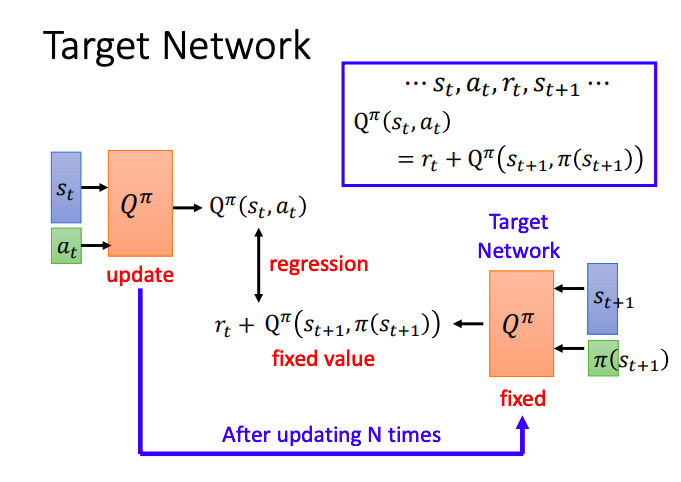

Q Learning学习有个毛病，如果某个action没有sample到，那么这个action可能永远不会被explore，这是不对的，一种方法是给予这种情况很小的概率$1-\epsilon$，另一种方法使用玻尔兹曼exploration，利用softmax...

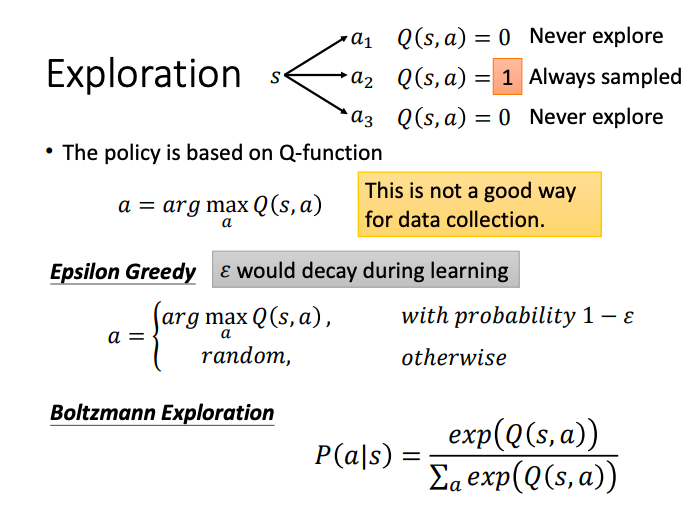

replay buffer是将之前学习的经验放到buffer缓存起来，然后从buffer中sample数据，这有点类似off-policy的方法...

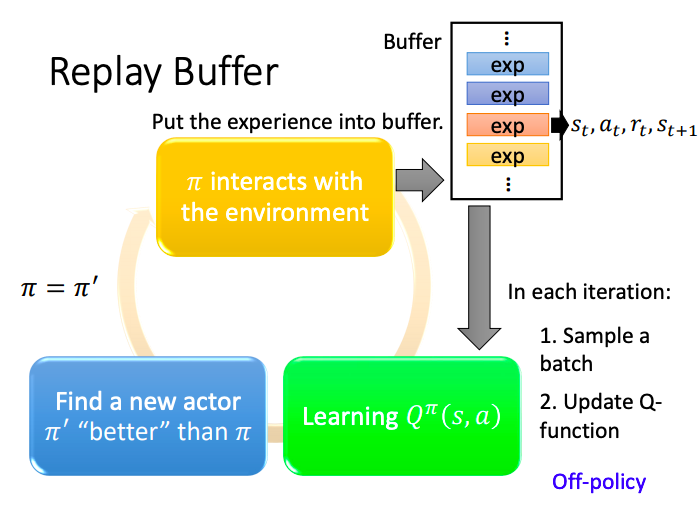

算法步骤：

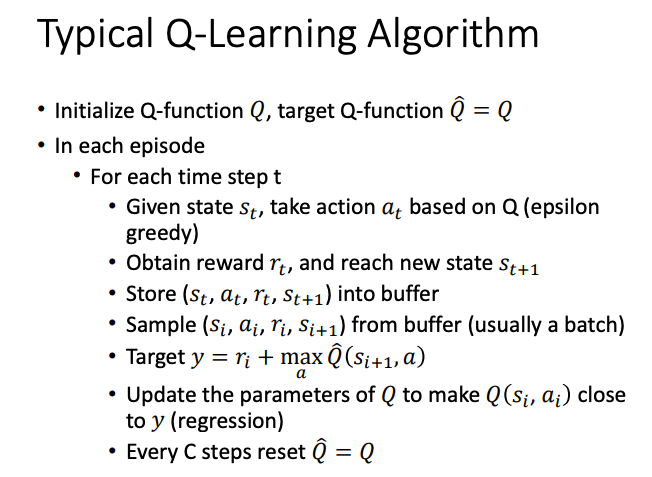

Q Learning的一些Tips：

Double DQN

Q值总是存在被高估的可能，主要是因为其优化function就是max，于是就有了Double DQN，double DQN是使用了另一个Q‘ function来控制可能会出现高估的Q

Double DQN就可以直接使用原先的DQN，原先的DQN本身就有两个Network，一个是需要updated的network，另一个就是target network，让target network是Q’就行....

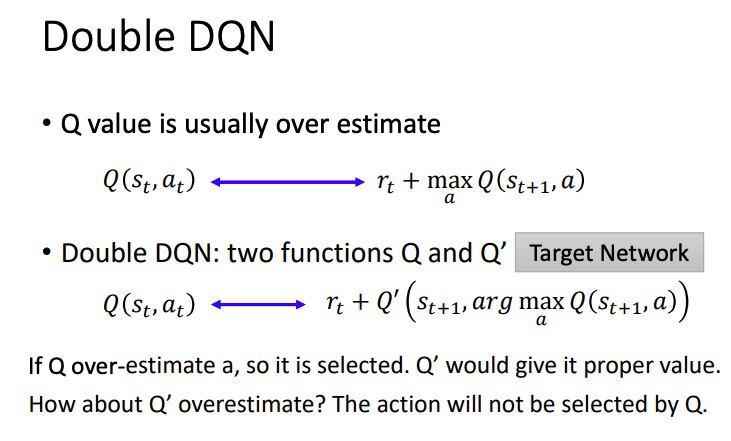

Dueling DQN

Dueling DQN很有意思，调整了DQN的网络架构，将原先的Q function输出拆成两个，一个是Vector V，和一个Matrix A，只通过学习这个Vector V来控制可能被低估的调差，如下图所示：

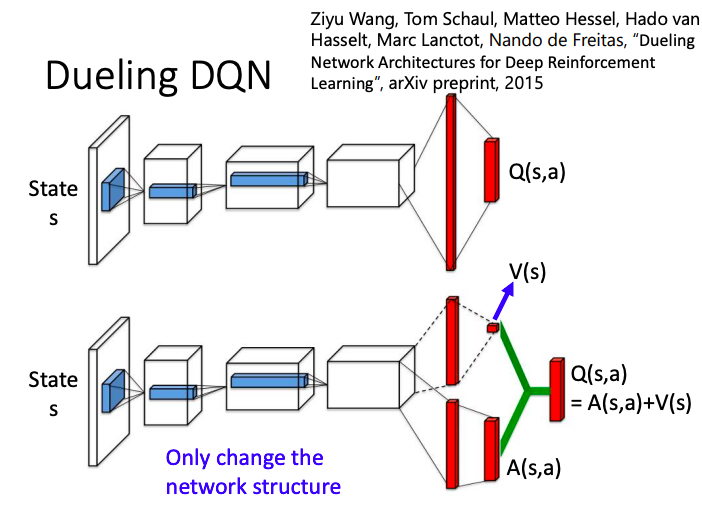
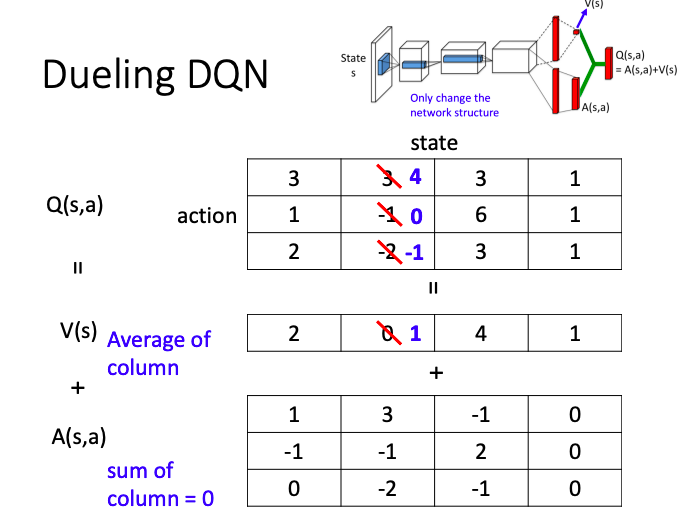

Dueling DQN为了使得在训练时强迫学习Vector V，而不至于直接copy Q的结果到A，使得V为0的情况，对A有一个constraint的限制，就是column列的总和必须为1，这样就不会直接copy了...

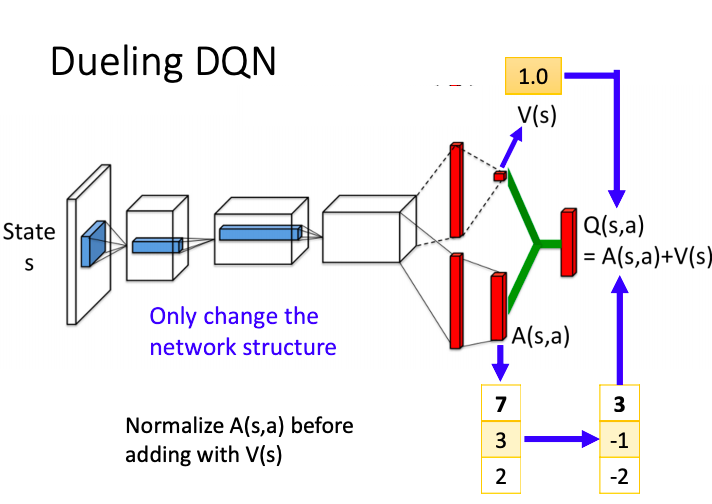

Prioritized Reply

对于之前训练得到的TD error很大的数据，应该优先被sample出来，重新更新参数，如下所示：

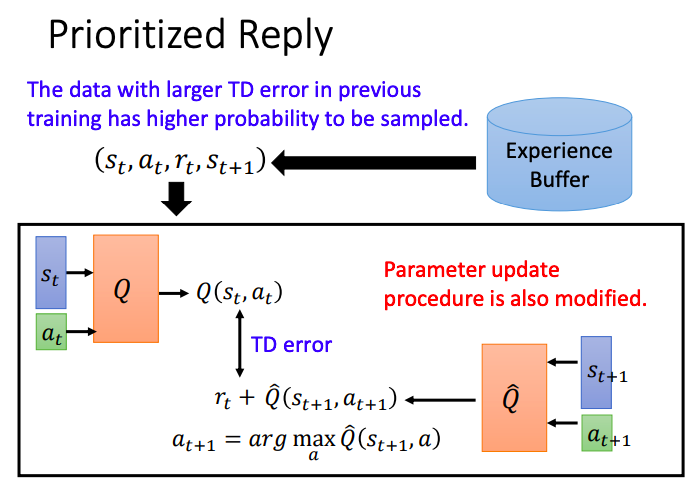

Multi-step

使用TC默认是使用buffer reply的，但是每次只sample，前后两次的数据，而对于Multi-step是sample后N次的数据，来加速训练，这也是一种在MC和TD之间的平衡

感觉使用target network的方法，目标就是期望现在网络能够习得将来的得分，也就是它是朝着将来的期望去走的...

N为可调参数...

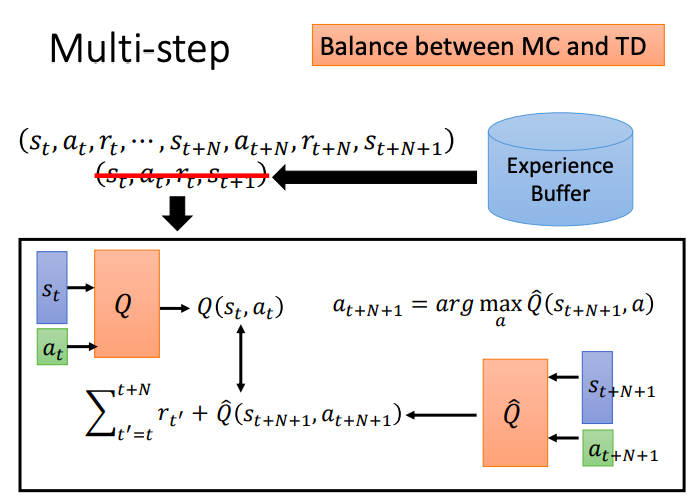

Noisy Net

在每次游戏开始时（也就是与环境互动前）加入一个比如高斯分布，然后让加入后的与环境进行互动...

同样的state，应该采取相同的action，而不是可能会随机...

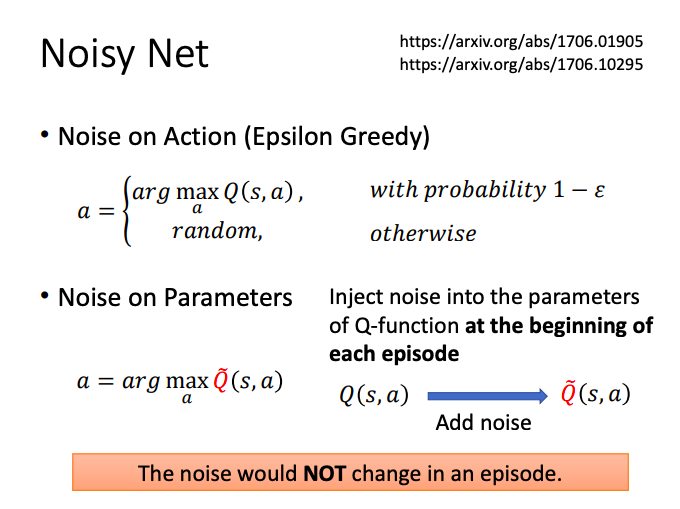
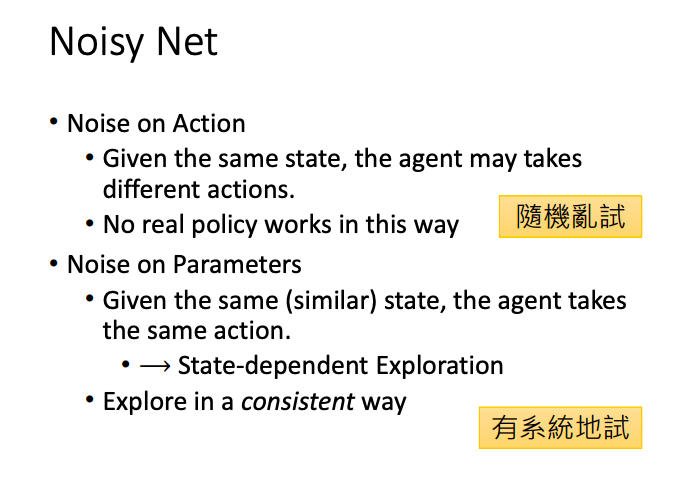

Distributional Q-function

使用expectation来代表reward可能存在的信息的丢失... Distributional Q-function是对分布建模，输出为action的分布...

action选择时mean最大的那个...

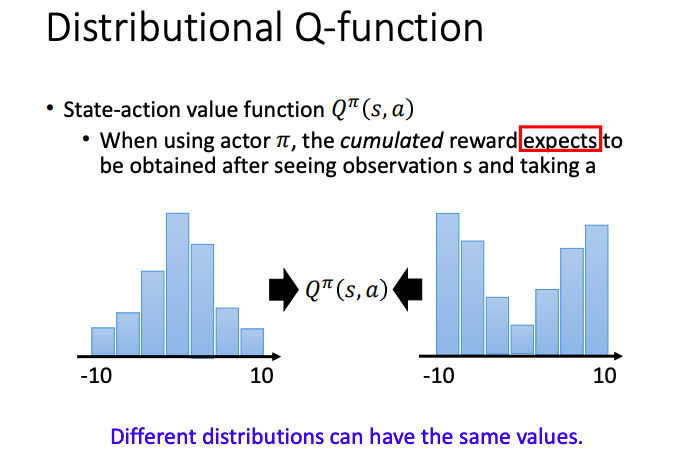
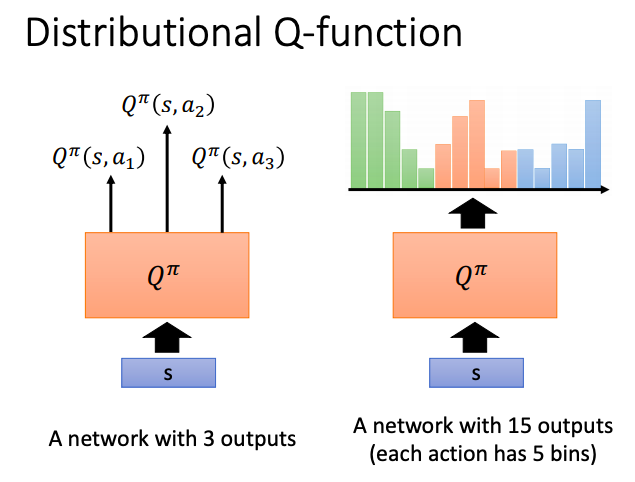

Rainbow

就是前面所有tips的组合...

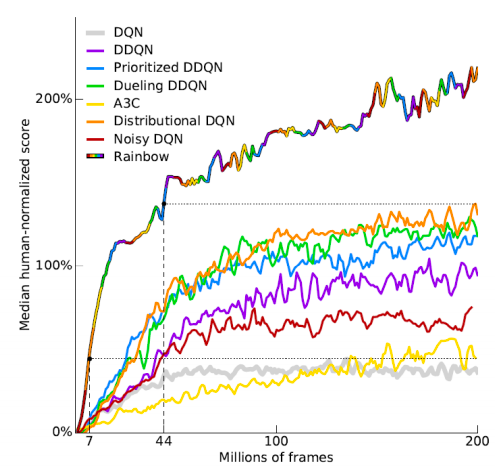
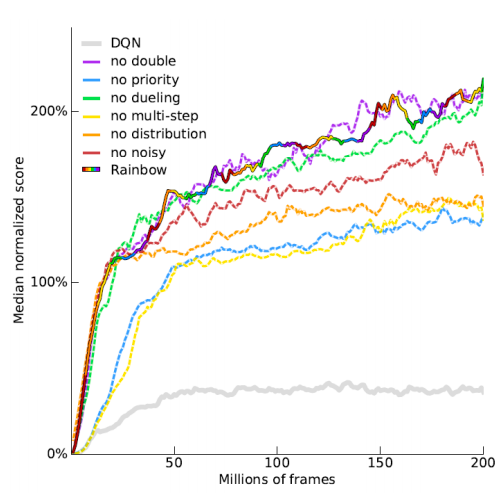

Q Learning相比Policy Gradient好的

很多时候action是continuous的，a是很多的，是无法穷举的，方法1是使用sample N个，方法2依然使用gradient ascent优化；方法3设计一个特定network；方法4使用A3C

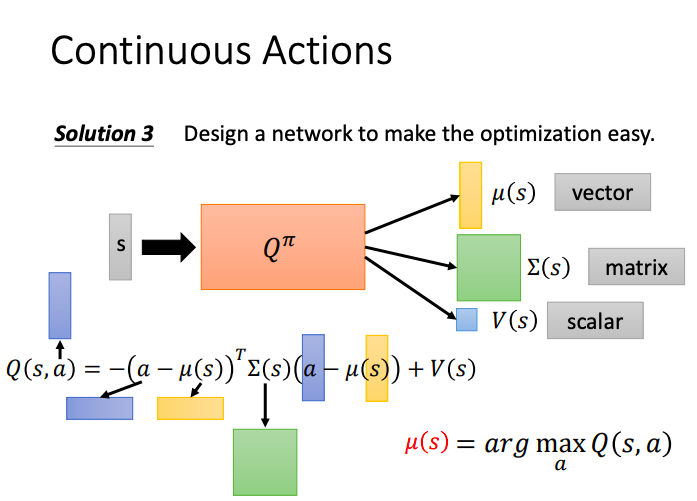

目标使得Q最大，(a-μ(s))^Tσ(s)(a-μ(s))是正值，前面加上负号，该项最小，即Q最大，只有当a=μ(s)时，最小，σ(s)保证是正定，类似混合高斯中的σ